# Análise exploratória de dados

In [15]:

from IPython.display import display, Markdown
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

colors = ["#9467bd", "#057476", "#FF7A00"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [16]:
## 0.Coleta de Dados

df = sns.load_dataset('diamonds')
df.to_csv('../data/raw/data.csv',index=False)

## 1. Descrição dos dados

In [17]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [18]:
dicionario = pd.DataFrame(
    [
        {
            "variavel":"carat",
            "descrição":"Quantidade de massa representada em Quilates",
            "tipo":"Quantitativo",
            "subtipo":"Contínua"
        },{
            "variavel":"cut",
            "descrição":"Qualidade de corte do diamante",
            "tipo":"Qualitativo",
            "subtipo":"Nominal"
        },{
            "variavel":"color",
            "descrição":"Cor do diamante em alfanumérica",
            "tipo":"Qualitativo",
            "subtipo":"Nominal"
        },{
            "variavel":"clarity",
            "descrição":"Classificação de clareza do diamante",
            "tipo":"Qualitativo",
            "subtipo":"Nominal"
        },{
            "variavel":"depth",
            "descrição":"Profundidade total em porcentagem",
            "tipo":"Quantitativa",
            "subtipo":"Discreta"
        },{
            "variavel":"table",
            "descrição":"Largura do topo do diamante relativo ao ponto mais largo (43–95)",
            "tipo":"Quantitativo",
            "subtipo":"Contínua"
        },{
            "variavel":"price",
            "descrição":"Preço em dolar",
            "tipo":"Quantitativo",
            "subtipo":"Contínua"
        },{
            "variavel":"x",
            "descrição":"Altura do diamante em mm",
            "tipo":"Quantitativo",
            "subtipo":"Contínua"
        },{
            "variavel":"y",
            "descrição":"Largura do diamante em mm",
            "tipo":"Quantitativo",
            "subtipo":"Contínua"
        },{
            "variavel":"z",
            "descrição":"Comprimento do diamante em mm",
            "tipo":"Quantitativo",
            "subtipo":"Contínua"
        }
    ])
dicionario.to_csv('../data/raw/dicionario_data.csv', index=False)

In [19]:
number_of_na_by_collumns = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()


if(number_of_na_rows == 0):
    display(Markdown("---\n"f"PODEMOS VER QUE TEMOS UM TOTAL DE `{number_of_na_rows}` DE LINHAS COM DADOS FALTANTES, ENTÃO NÃO PRECISAMOS ALTERAR NADA""\n\n ---"))
else:
    display(Markdown("---\n"f"AS COLUNAS QUE ESTÃO COM DADOS FALTANTES SÃO: `{number_of_na_by_columns}` E TEMOS UM TOTAL DE `{number_of_na_rows}` LINHAS COM DADOS FALTANTES,"
                     f"ENTÃO UTILIZAREMOS UM DROP PARA RETIRAR COLUNAS COM DADOS FALTANTES"))
    df.dropna(inplace=True)



---
PODEMOS VER QUE TEMOS UM TOTAL DE `0` DE LINHAS COM DADOS FALTANTES, ENTÃO NÃO PRECISAMOS ALTERAR NADA

 ---

In [20]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


***AQUI PODEMOS VER ALGUMAS OBSERVAÇÕES COMO:***

. Os cortes classificados como "ideal" tem maior frequência e isso é muito bom.

. A cor que aparece com mais frequência dentre os diamantes é a classificada como "G".

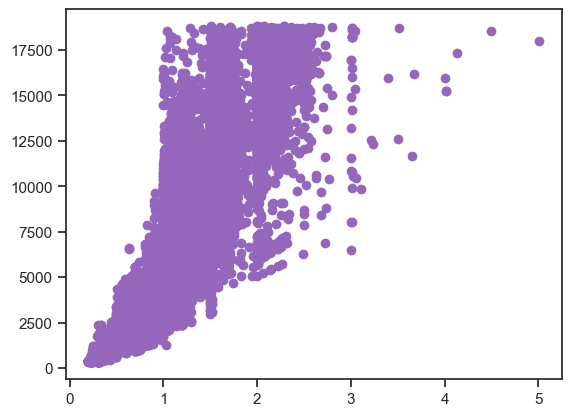

(53940,)
(53940,)


In [21]:

plt.scatter(df['carat'],df['price'])
plt.show()

print(df['carat'].shape)
print(df['price'].shape)

PODEMOS VER QUE EXISTEM DADOS DISCREPANTES ENTRE ESSAS 2 VARIAVEIS, VAMOS TRATAR

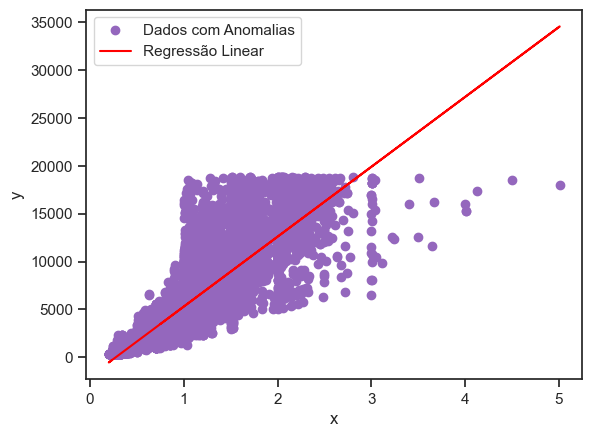

In [22]:
from sklearn.linear_model import LinearRegression

x_without_anomalies = np.array(x_without_anomalies)
y_without_anomalies = np.array(y_without_anomalies)
x = np.array(x)
y = np.array(y)


model = LinearRegression()
model.fit(x_without_anomalies.reshape(-1, 1), y_without_anomalies.reshape(-1, 1))


y_hat = model.predict(x.reshape(-1, 1))


plt.scatter(x, y, label='Dados com Anomalias')
plt.plot(x, y_hat, color='red', label='Regressão Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [30]:
x = df['carat']
y = df['price']
y_mean = y.mean()
y_std = y.std()

print(y_mean,y_std)

z_score = np.abs((y - y_mean)/ y_std)
print(z_score)

x_without_anomalies = x[z_score <= 3]
y_without_anomalies = y[z_score <= 3]



3932.799721913237 3989.439738146379
0        0.904087
1        0.904087
2        0.903836
3        0.902081
4        0.901831
           ...   
53935    0.294728
53936    0.294728
53937    0.294728
53938    0.294728
53939    0.294728
Name: price, Length: 53940, dtype: float64


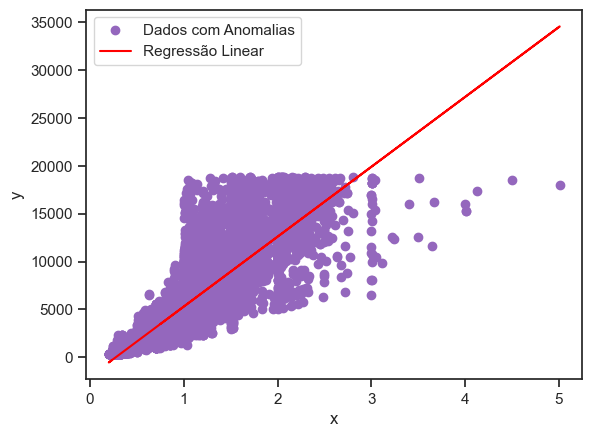

In [31]:
from sklearn.linear_model import LinearRegression

x_without_anomalies = np.array(x_without_anomalies)
y_without_anomalies = np.array(y_without_anomalies)
x = np.array(x)
y = np.array(y)


model = LinearRegression()
model.fit(x_without_anomalies.reshape(-1, 1), y_without_anomalies.reshape(-1, 1))


y_hat = model.predict(x.reshape(-1, 1))


plt.scatter(x, y, label='Dados com Anomalias')
plt.plot(x, y_hat, color='red', label='Regressão Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


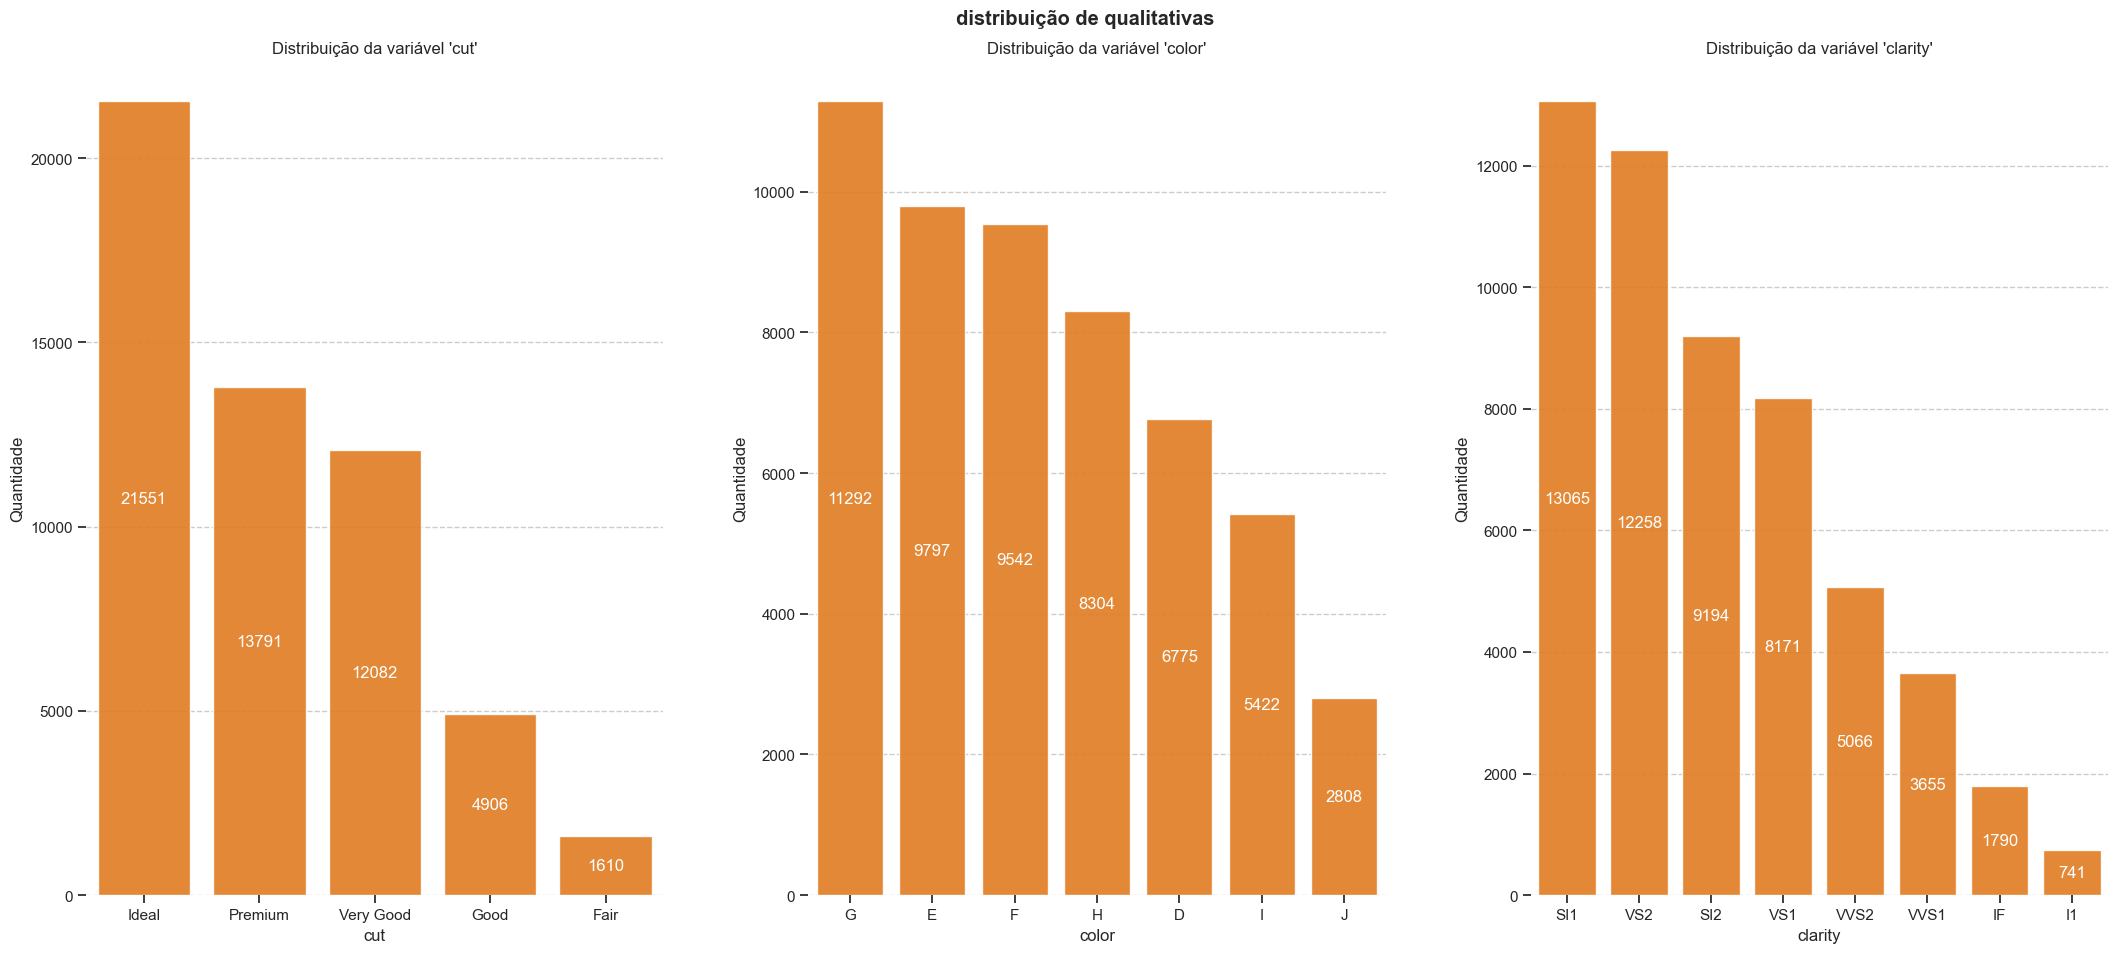

In [25]:
# VAMOS ENTÃO DISPOR OS DADOS EM GRÁFICOS, PARA TERMOS OUTRA VISÃO DOS DADOS

fig, axes = plt.subplots(1,3, figsize=(22,10))
plt.tight_layout(w_pad=6, pad=4)
fig.suptitle('distribuição de qualitativas', fontweight = 'bold')
for i, variavel in enumerate(dicionario.query("tipo=='Qualitativo'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[2],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='--')
plt.show()

***AGORA VAMOS ENTENDER A CORRELAÇÃO ENTRE AS COLUNAS***

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre as colunas')
plt.show()

NameError: name 'correlacao' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
corr_with_price = correlacao['price'].sort_values(ascending=False)
print(corr_with_price)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


***PODEMOS NOTAR DESSAS DUAS MANEIRAS QUE O PREÇO ESTÁ BASTANTE RELACIONADO POSITIVIMENTE COM ALGUMAS COLUNAS, COMO: CARAT, X,Y E Z***

## 2. Perguntas de partida e hipóteses

***PRIMEIRA PERGUNTA: QUAIS CORES TEM A MÉDIA DE PREÇOS MAIOR?***

color
J    5323.818020
I    5091.874954
H    4486.669196
G    3999.135671
F    3724.886397
D    3169.954096
E    3076.752475
Name: price, dtype: float64


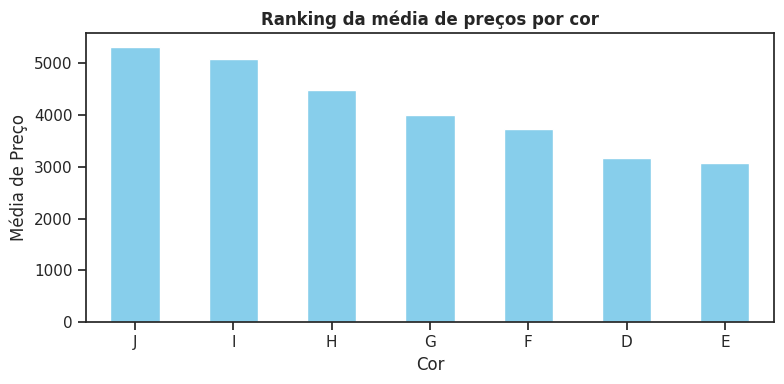

In [ ]:

media_por_cor = df.groupby('color')['price'].mean().sort_values(ascending=False)
print(media_por_cor)
fig, axes = plt.subplots(figsize=(8,4))
media_por_cor.plot(kind='bar', color='skyblue')

plt.xlabel('Cor')
plt.ylabel('Média de Preço')
plt.title('Ranking da média de preços por cor', fontweight = 'bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

***SEGUNDA PERGUNTA: QUAL O RENDIMENTO TOTAL DE CADA COR?***

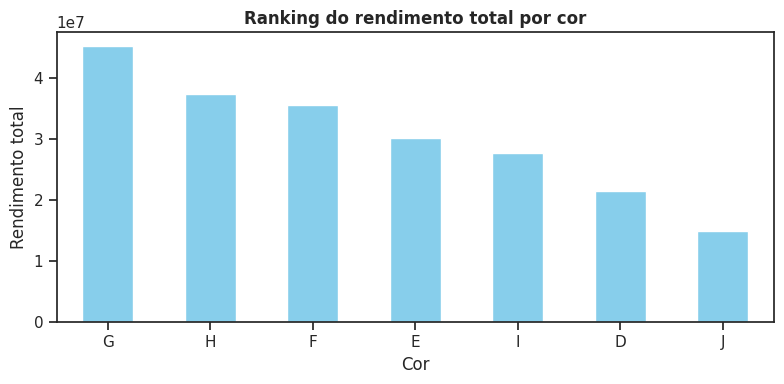

color
G    45158240
H    37257301
F    35542866
E    30142944
I    27608146
D    21476439
J    14949281
Name: price, dtype: int64

In [ ]:
sum_per_color = df.groupby('color')['price'].sum().sort_values(ascending=False)
fig, axes = plt.subplots(figsize=(8,4))
sum_per_color.plot(kind='bar', color='skyblue')

plt.xlabel('Cor')
plt.ylabel('Rendimento total')
plt.title('Ranking do rendimento total por cor', fontweight = 'bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

sum_per_color

## 3. Insights

podemos perceber com a analise desse df que: 
- As cores I e J, apesar de serem as 2 com a maior média de preços, são as menos frequentes do df
- As cores que trazem maior rendimento, não necessariamente são as que apresentam preços mais altos por venda
- A altura dos diamantes fabricados tem forte correlação positiva com o preço.